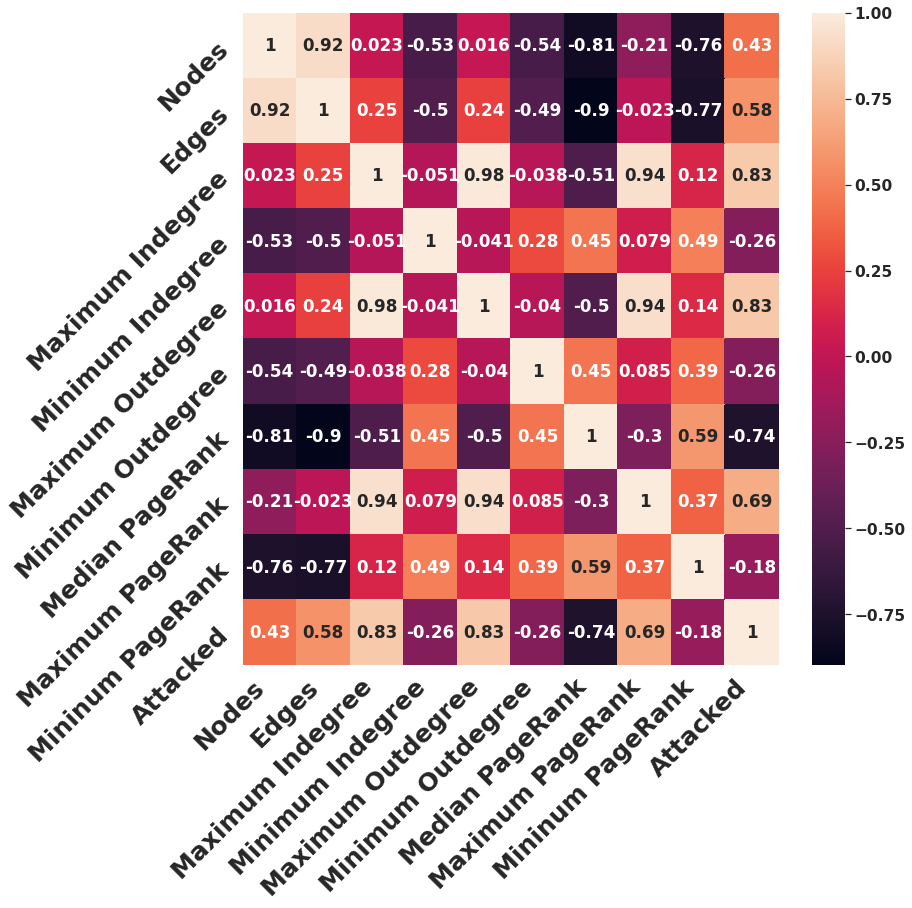

In [ ]:
import pandas as pd
import networkx as nx
import hashlib
import numpy as np
import seaborn as sn
from sklearn import naive_bayes as nb 
import matplotlib.pyplot as plt
import pandas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

# load dataset
#File name change for replay and mixedone
dataframe = pandas.read_table('/content/mixedGraph_kde_figures.txt')
data = dataframe.drop("No.", axis=1)
data = data.drop("Std PageRank", axis=1)
data = data.drop("Var PageRank", axis=1)






df = pd.DataFrame(data)

corrMatrix = df.corr()
#print (corrMatrix)


sn.set(font_scale=1.4)


sn.heatmap(corrMatrix, annot=True, fmt='.2g')


plt.rcParams['font.weight'] = 'bold'

plt.xticks(rotation=45, ha ='right', fontsize = 25, fontweight = 'bold' )
plt.yticks(rotation=45, ha ='right', fontsize = 25, fontweight = 'bold')

#plt.rcParams['fontwei'] = 4
plt.rcParams['figure.figsize'] = (12, 12)   
plt.savefig("corr.png", bbox_inches = "tight")
plt.savefig("corr.svg", bbox_inches = "tight")
plt.savefig("corr.pdf", bbox_inches = "tight")


In [ ]:
import pandas as pd
import networkx as nx
import hashlib
import numpy as np
import seaborn as sn
from sklearn import naive_bayes as nb 
import matplotlib.pyplot as plt
import pandas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# load dataset
#File name change for replay and mixedone
dataframe = pandas.read_table('/content/mixedGraph_GraphFeajjjjjtures.txt')
data = dataframe.drop("No.", axis=1)
data = data.drop("StdPageRank", axis=1)
data = data.drop("VarPageRank", axis=1)






# df = pd.DataFrame(data)

# corrMatrix = df.corr()
# print (corrMatrix)

# split into input (X) and output (Y) variables


l = len(dataframe)
X = data.values

labels = []
for i in range (0,l):
  if X[i][9] == 0:
    labels.append(0)
  else:
    labels.append(1)




features = data.iloc[:,0:9]



print(labels.count(0))
print(labels.count(1))




# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                            labels,
                                                            test_size=0.33,
                                                            random_state= 42)#

  # Initialize our classifier
nb =nb.GaussianNB()


  # Train our classifier
nb.fit(train, train_labels)
preds = nb.predict(test)
  
  # Evaluate accurac
print(accuracy_score(test_labels, preds))
print(test_labels.count(0))
print(test_labels.count(1))
cm_mixed = confusion_matrix(test_labels, preds)
cm_mixed = cm_mixed.T
print(cm_mixed)

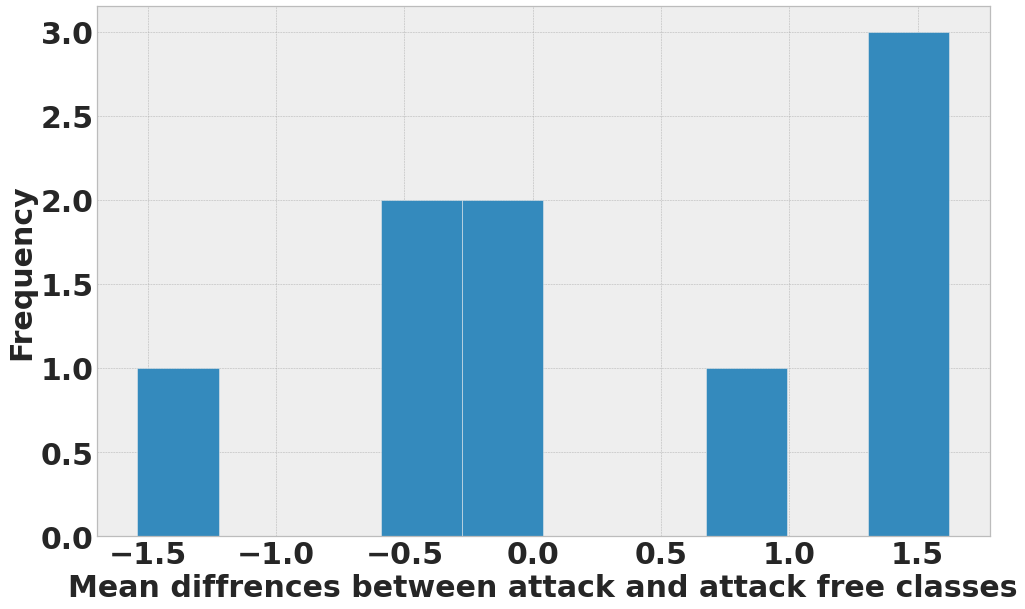

In [ ]:
#Mean difference between attack and attackfree


#here 0 means True as T and 1 means False F
#Below for the all code

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(16,9.75))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['Attacked'].values

transformed = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(X_train))


#print(transformed[y_train == True].mean() - transformed[y_train == False].mean())
#plt.hist(transformed[y_train == 'F'].mean() - transformed[y_train == 'T'].mean())

plt.hist(transformed[y_train == 1].mean() - transformed[y_train == 0].mean())

plt.ylabel('Frequency', fontsize = 30, fontweight = 'bold')
plt.xlabel('Mean diffrences between attack and attack free classes', fontsize = 30, fontweight = 'bold')
plt.tick_params(labelsize=30)
# plt.title('Histogram of sample mean differences between two classes', **title_config)
# plt.savefig("mean_difference.png", bbox_inches = "tight")
# plt.savefig("mean_difference.svg", bbox_inches = "tight")
plt.savefig("mean_difference.pdf", bbox_inches = "tight")

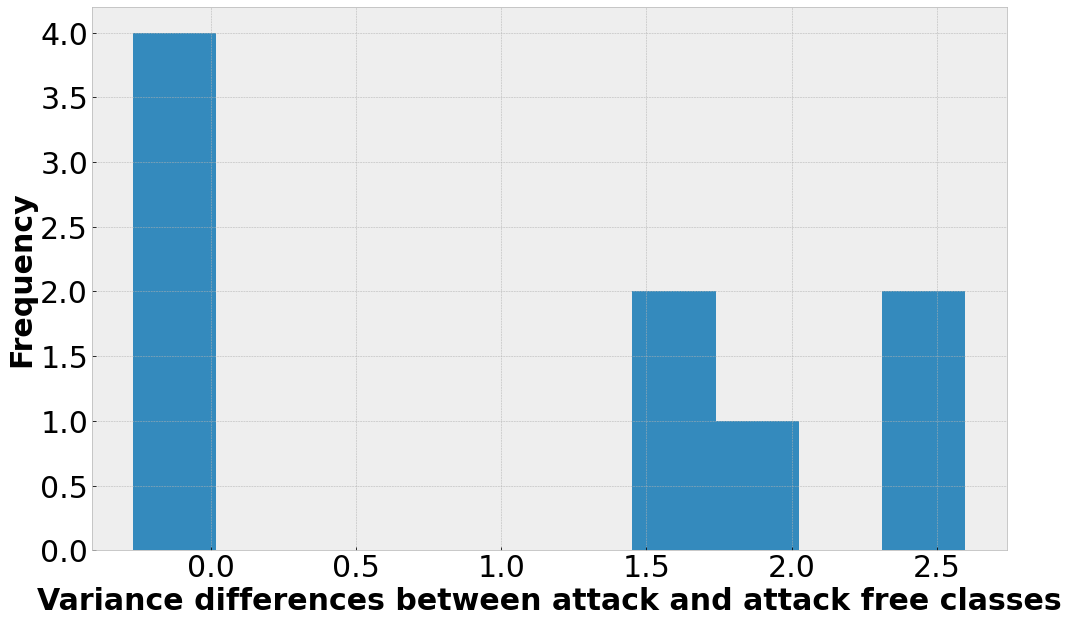

In [ ]:
#Variance difference between attack free and attack
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(16.4,10))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['Attacked'].values

#plt.hist(transformed[y_train == 'F'].var() - transformed[y_train == 'T'].var())

plt.hist(transformed[y_train == 1].var() - transformed[y_train == 0].var())

plt.xlabel('Variance differences between attack and attack free classes', fontsize = 30, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 30, fontweight = 'bold')
plt.tick_params(labelsize=30)
plt.savefig("variance_diference.png", bbox_inches = "tight")
plt.savefig("variance_diference.svg", bbox_inches = "tight")
plt.savefig("variance_diference.pdf", bbox_inches = "tight")

2
4


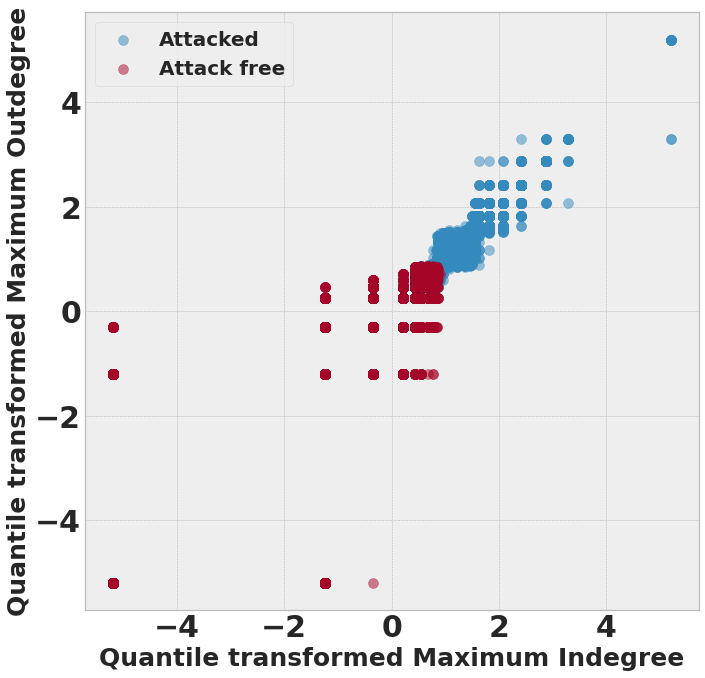

In [ ]:
#Least variance features plotting using transformed features
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(11,11))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['Attacked'].values
#select = (transformed[y_train == 'F'].var() - transformed[y_train == 'T'].var()).nsmallest(2).index

select = (transformed[y_train == 1].var() - transformed[y_train == 0].var()).nsmallest(2).index

print(select[0])
print(select[1])


#plt.scatter(transformed.loc[y_train == 'F', select[0]], transformed.loc[y_train == 'F', select[1]], alpha=0.5, label='Attack', s = 100)
#plt.scatter(transformed.loc[y_train == 'T', select[0]], transformed.loc[y_train == 'T', select[1]], alpha=0.5, label='Attack free', s = 100)


plt.scatter(transformed.loc[y_train == 1, select[0]], transformed.loc[y_train == 1, select[1]], alpha=0.5, label='Attacked', s = 100)
plt.scatter(transformed.loc[y_train == 0, select[0]], transformed.loc[y_train == 0, select[1]], alpha=0.5, label='Attack free', s = 100)
plt.ylabel("Quantile transformed Maximum Outdegree", fontsize = 25, fontweight = 'bold')
plt.xlabel("Quantile transformed Maximum Indegree", fontsize = 25, fontweight = 'bold')
plt.tick_params(labelsize=30)
plt.legend(fontsize = 20)

plt.savefig("higherSampleVariance.pdf", bbox_inches = "tight")
plt.savefig("higherSampleVariance.png", bbox_inches = "tight")

plt.savefig("higherSampleVariance.svg", bbox_inches = "tight")

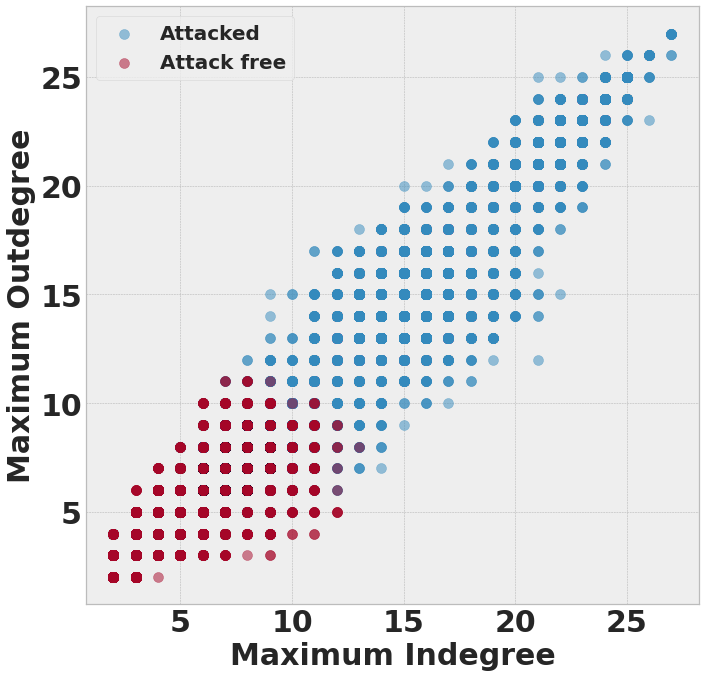

In [ ]:
#Least variance features plotting using orginal features
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(11,11))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['Attacked'].values



#plt.scatter(X_train[y_train == 'F', select[0]], X_train[y_train == 'F', select[1]], alpha=0.5, label='Attack', s= 100)
#plt.scatter(X_train[y_train == 'T', select[0]], X_train[y_train == 'T', select[1]], alpha=0.5, label='Attack free', s= 100)





plt.scatter(X_train[y_train == 1, select[0]], X_train[y_train == 1, select[1]], alpha=0.5, label='Attacked', s= 100)
plt.scatter(X_train[y_train == 0, select[0]], X_train[y_train == 0, select[1]], alpha=0.5, label='Attack free', s= 100)


#plt.title('Bounds in Data', **title_config)
plt.xlabel("Maximum Indegree", fontsize = 30, fontweight = 'bold')
plt.ylabel("Maximum Outdegree", fontsize = 30, fontweight = 'bold')
plt.tick_params(labelsize=30)
plt.legend(fontsize = 20);
plt.savefig("bounds_in_data.png", bbox_inches = "tight")
plt.savefig("bounds_in_data.svg", bbox_inches = "tight")
plt.savefig("bounds_in_data.pdf", bbox_inches = "tight")

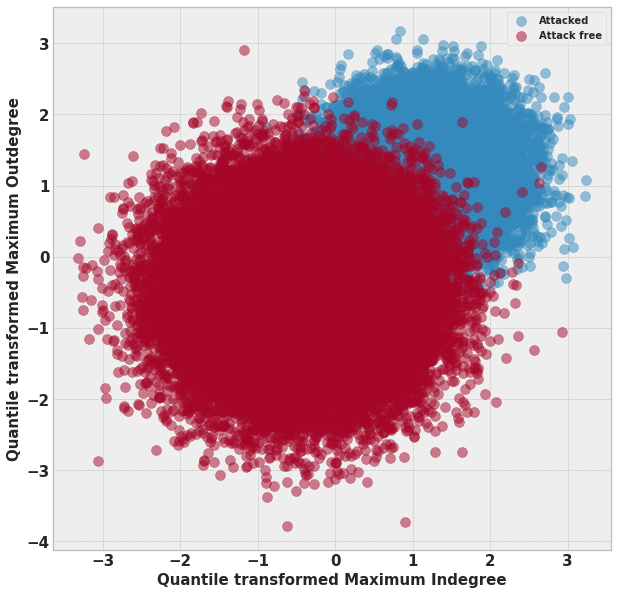

In [ ]:
#Gaussian distribution plotting
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(10,10))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['Attacked'].values

size0 = (y_train == 1).sum()
size1 = y_train.size - size0

x0 = np.random.normal(transformed.loc[y_train == 1, select[0]].mean(),
                      transformed.loc[y_train == 1, select[0]].std(), size=size0)

y0 = np.random.normal(transformed.loc[y_train == 1, select[1]].mean(),
                      transformed.loc[y_train == 1, select[1]].std(), size=size0)
x1 = np.random.normal(transformed.loc[y_train == 0, select[0]].mean(),
                      transformed.loc[y_train == 0, select[0]].std(), size=size1)

y1 = np.random.normal(transformed.loc[y_train == 0, select[1]].mean(),
                      transformed.loc[y_train == 0, select[1]].std(), size=size1)

plt.scatter(x0, y0, alpha=0.5, label='Attacked', s= 100)
plt.scatter(x1, y1, alpha=0.5, label='Attack free', s= 100)

plt.xlabel("Quantile transformed Maximum Indegree", fontsize = 15, fontweight = 'bold')
plt.ylabel("Quantile transformed Maximum Outdegree", fontsize = 15, fontweight = 'bold')
plt.tick_params(labelsize=15)

plt.legend(fontsize = 10)
plt.savefig("simulated_data.png", bbox_inches = "tight")
plt.savefig("simulated_data.pdf", bbox_inches = "tight")
plt.savefig("simulated_data.svg", bbox_inches = "tight")